In [16]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np

In [17]:
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000] 
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [3]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

In [4]:
pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X_train)

In [5]:
pca.n_components_

np.int64(154)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [7]:
clf = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))

In [8]:
param_dist = {
    "pca__n_components": np.arange(10,80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

In [9]:
rnd_search = RandomizedSearchCV(clf, param_dist, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:10_000], y_train[:10_000])

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'pca__n_components': array([10, 11... 78, 79]), 'randomforestclassifier__n_estimators': array([ 50, ...97, 498, 499])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [10]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': np.int64(304),
 'pca__n_components': np.int64(62)}

In [11]:
X_recovered = pca.inverse_transform(X_reduced)

In [12]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [19]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [ ]:
X_reduced = inc_pca.transform(X_train)

In [ ]:
filename = "my_mnist.mmap" 
X_mmap = np.memmap(filename, dtype="float32", mode='write', shape=X_train.shape)
X_mmap[:] = X_train # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

In [ ]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_train)

<h1>Problem 9:</h1>

In [20]:
from time import time

In [21]:
X_train, X_test, y_train, y_test = mnist.data[:60_000], mnist.data[60_000:], mnist.target[:60_000], mnist.target[60_000:]

In [22]:
rf = RandomForestClassifier(random_state=42)

In [23]:
%time rf.fit(X_train, y_train)

Total training time: 51.16


In [24]:
rf.score(X_test, y_test)

0.9705

In [25]:
pca = PCA(n_components=0.95)

X_train_reduced, X_test_reduced = pca.fit_transform(X_train), pca.transform(X_test)

In [26]:
pca.n_components_

np.int64(154)

In [27]:
rf = RandomForestClassifier(random_state=42)

In [35]:
%time rf.fit(X_train_reduced, y_train)

CPU times: total: 2min 37s
Wall time: 2min 38s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
rf.score(X_test_reduced, y_test)

0.9488

In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)

In [31]:
%time sgd.fit(X_train_reduced, y_train)

CPU times: total: 31.8 s
Wall time: 31.9 s


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [32]:
sgd.score(X_test_reduced, y_test)

0.8959

<h1>Problem 10</h1>

In [33]:
from sklearn.manifold import TSNE

In [34]:
X_sample, y_sample = mnist.data[:5_000], mnist.target[:5_000]

In [65]:
y_sample

array(['5', '0', '4', ..., '2', '1', '2'], shape=(5000,), dtype=object)

In [37]:
X_embedded = TSNE().fit_transform(X_sample)

In [66]:
color_dict = {'0': 'b', '1': 'r', '2': 'g', '3':'y', '4':'k', '5':'m', '6':'c', '7':'orange', '8':'purple', '9':'brown'}
colors = [color_dict.get(n) for n in y_sample]

In [38]:
import matplotlib.pyplot as plt

In [77]:
color_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

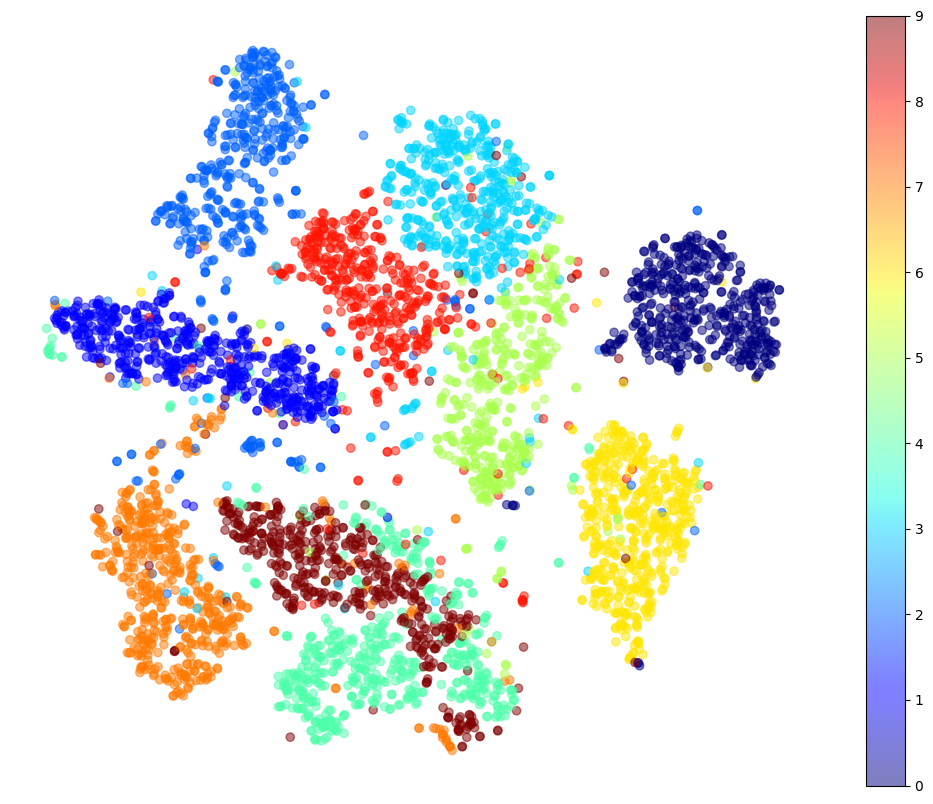

In [88]:
plt.figure(figsize=(13,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_sample.astype('int8'), alpha=0.5, cmap='jet')
plt.axis('off')
plt.colorbar() 
plt.show()

In [111]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X,y, min_distance=0.04, images=None, figsize=(13,10)):
    # Scale features
    X_normalized = MinMaxScaler().fit_transform(X) 
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]]) 

    plt.figure(figsize=figsize) 
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis('off')
    ax = plt.gca()
    
    for index, image_coordinates in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coordinates, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coordinates]]
            if images is None:
                plt.text(image_coordinates[0], image_coordinates[1], str(int(y[index])), 
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coordinates)
                ax.add_artist(imagebox)

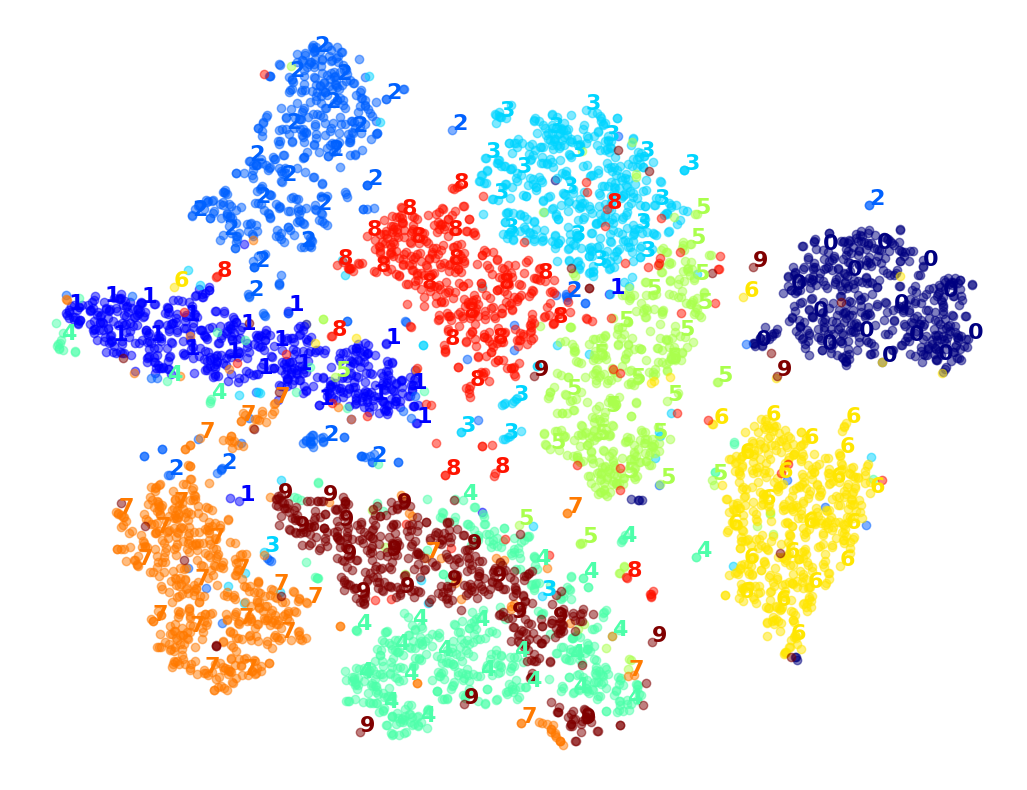

In [112]:
plot_digits(X_embedded, y_sample)

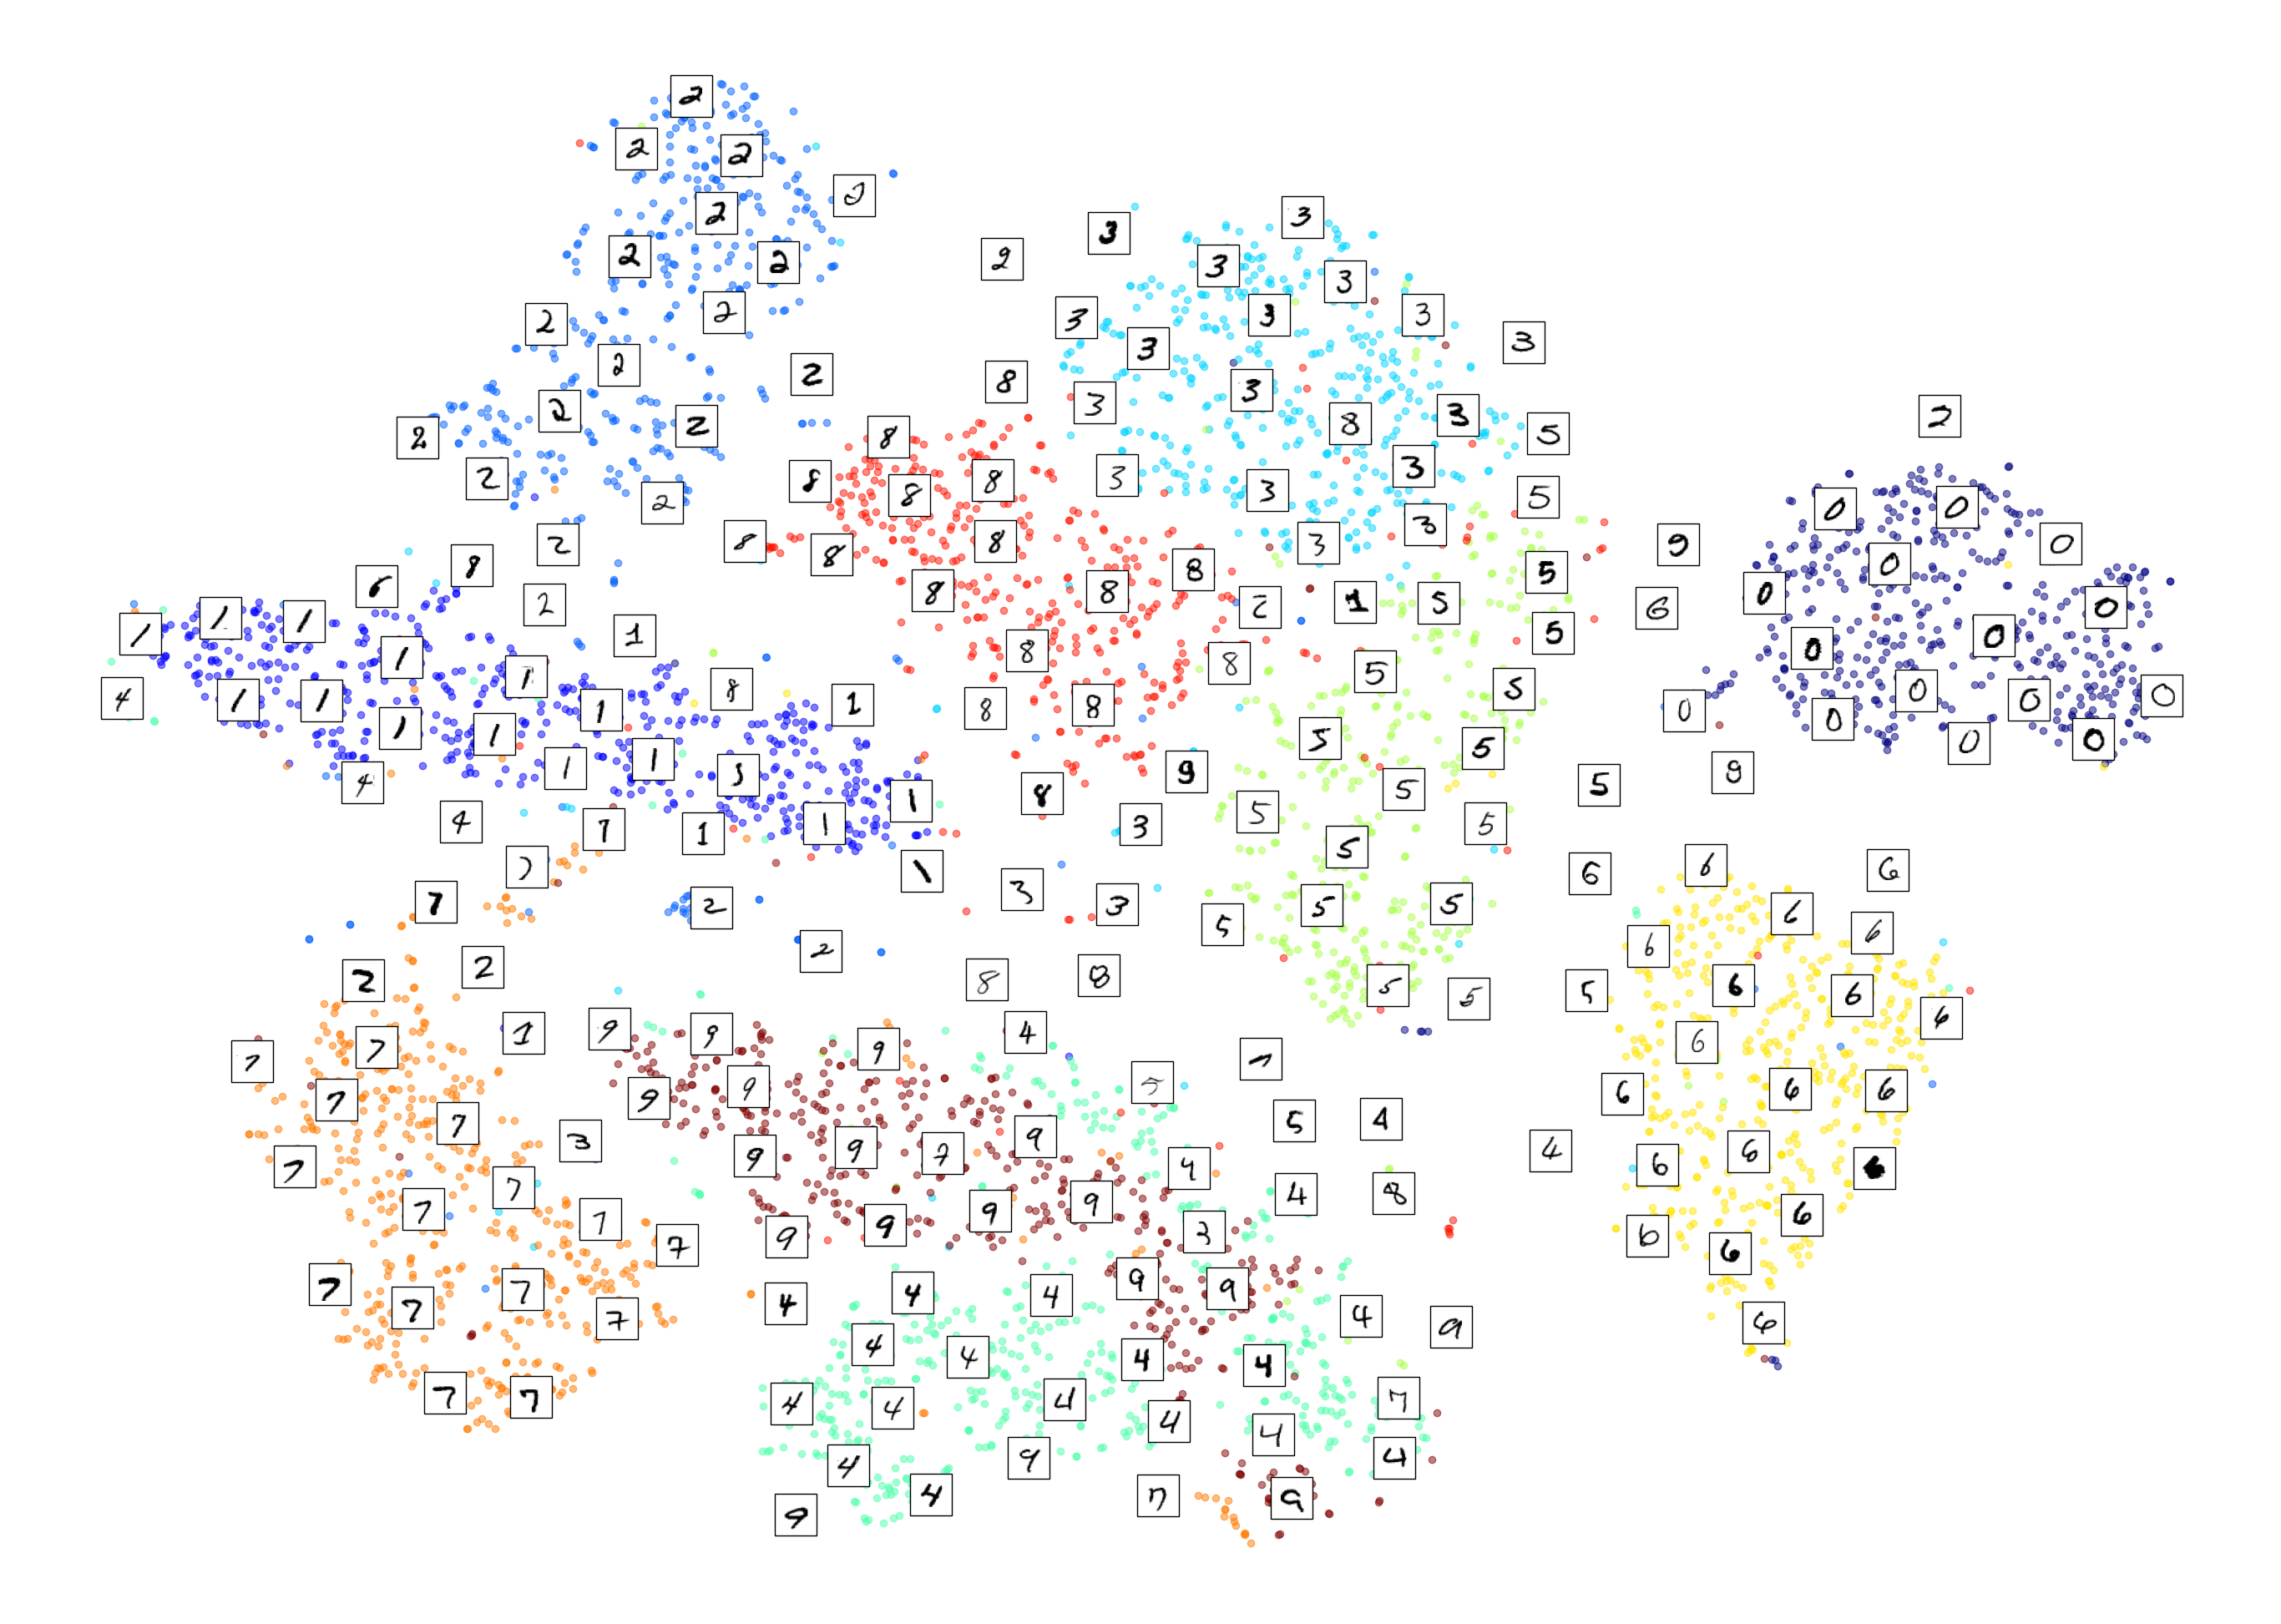

In [113]:
plot_digits(X_embedded, y_sample, images=X_sample, figsize=(35,25))

CPU times: total: 266 ms
Wall time: 81.2 ms


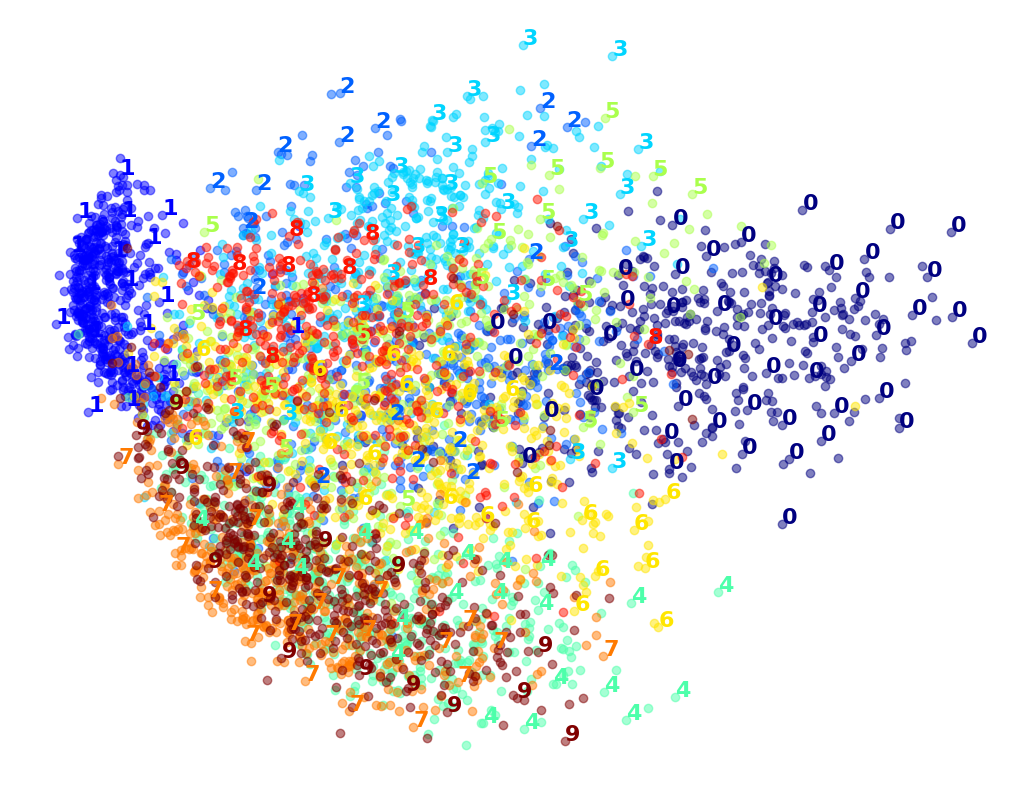

In [115]:
# Trying other PCA algorithms
pca = PCA(n_components=2, random_state=42)
%time X_pca = pca.fit_transform(X_sample)
plot_digits(X_pca, y_sample)
plt.show()

CPU times: total: 4.39 s
Wall time: 1.87 s


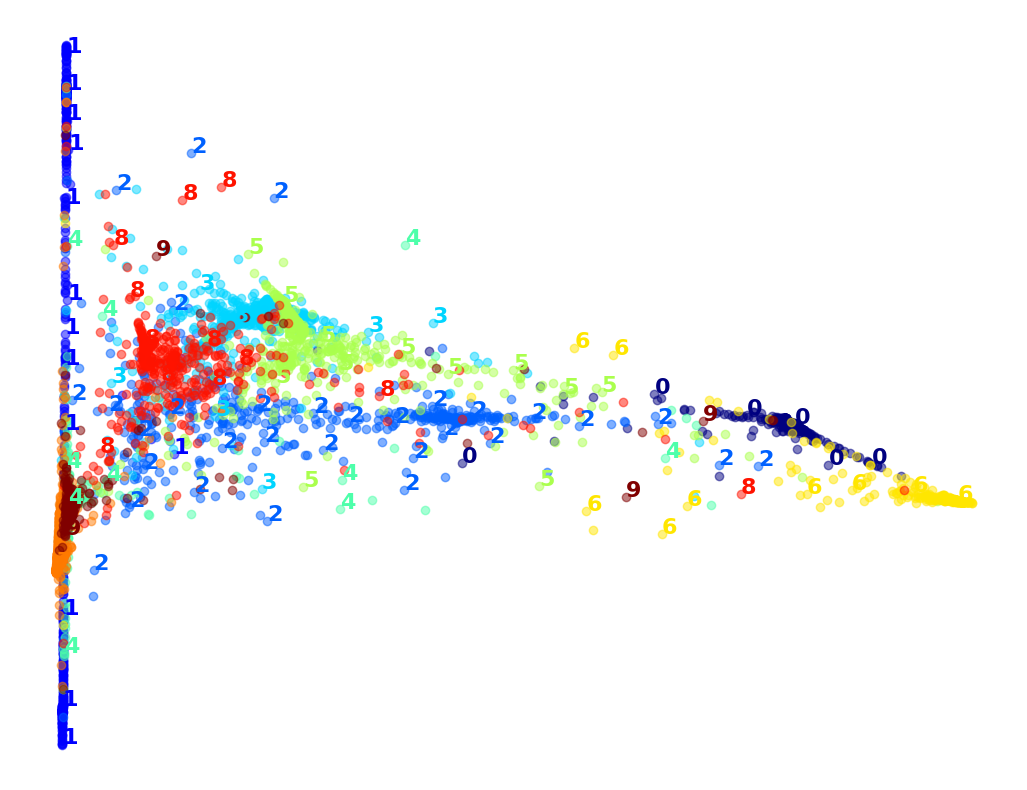

In [116]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42) 
%time X_lle = lle.fit_transform(X_sample)
plot_digits(X_lle, y_sample)
plt.show()

In [117]:
from sklearn.manifold import MDS 
mds = MDS(n_components=2, random_state=42) 
%time X_mds = mds.fit_transform(X_sample)
plot_digits(X_mds, y_sample)
plt.show()

C:\Users\lomoser\Desktop\Python Projects\Hands_On_Machine_Learning\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


CPU times: total: 2min 2s
Wall time: 1min 19s


KeyboardInterrupt: 